<h1>시각인지</h1>

In [2]:
# 라이브러리
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#데이터셋
mnist = tf.keras.datasets.mnist
(xtrain,ytrain), (xtest,ytest) = mnist.load_data()
print( xtrain.shape, xtest.shape )

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28) (10000, 28, 28)


# 탐색적 데이터 분석

<Figure size 640x480 with 0 Axes>

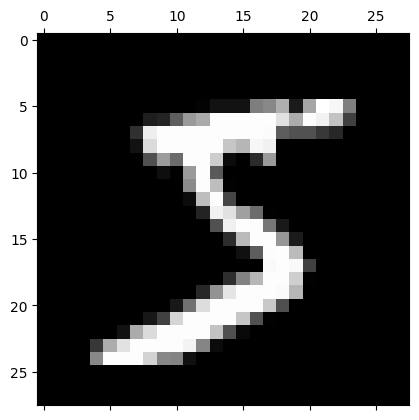

In [4]:
# 샘플 데이터
plt.gray()
plt.matshow( xtrain[0] )
plt.show()

In [5]:
print( xtrain.max(), xtrain.min() )

255 0


In [6]:
# 전처리: min-max normalization
xtrain, xtest = xtrain/255.0, xtest/255.0

In [7]:
np.unique( ytrain, return_counts=True )

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

# CNN 모델

모델 정의

In [ ]:
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Input(shape=(28,28,1)) )
model.add( tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu') )#stride: 1, padding: 0  (default)
model.add( tf.keras.layers.MaxPooling2D(pool_size=(2,2)) )
model.add( tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu') )
model.add( tf.keras.layers.MaxPooling2D(pool_size=(2,2)) )
model.add( tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu') )
model.add( tf.keras.layers.Flatten() )
model.add( tf.keras.layers.Dense(units=64, activation='relu') )
model.add( tf.keras.layers.Dense(units=10, activation='softmax') )

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

모델 훈련과 평가

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(xtrain,ytrain,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9534 - loss: 0.1501
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9849 - loss: 0.0481
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9902 - loss: 0.0336
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9918 - loss: 0.0265
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9935 - loss: 0.0207


In [12]:
model.evaluate( xtest, ytest )

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9908 - loss: 0.0316


[0.03162741661071777, 0.9908000230789185]

# 사전 학습 모델의 사용

In [13]:
# VGG16 model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
model = VGG16()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


이미지 데이터 준비

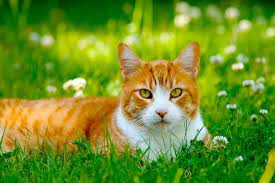

In [14]:
# 이미지의 상대경로 또는 절대경로를 입력
img = image.load_img('cat.jpeg')
img

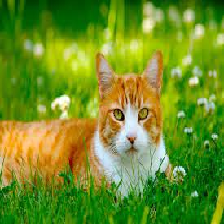

In [15]:
img = image.load_img('cat.jpeg', target_size=(224,224))
img

In [17]:
# 이미지 데이터를 3D텐서 데이터로 변환
x = image.img_to_array(img)#3차원
x = np.expand_dims(x, axis=0)#4차원(이미지 여러 개)
x = preprocess_input(x)
print(x.shape)

(1, 224, 224, 3)


예측

In [18]:
preds = model.predict(x)  # 1,000 개의 클래스에 대한 확률

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


In [19]:
print('Predicted:', decode_predictions(preds, top=3)[0])

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Predicted: [('n02123159', 'tiger_cat', np.float32(0.9592292)), ('n02123045', 'tabby', np.float32(0.021420132)), ('n02124075', 'Egyptian_cat', np.float32(0.006415739))]


# 연습문제

1. 아래와 같이 Fashion MNIST 데이터를 이용하여 물음에 답하시오.<br>
(1) 훈련데이터와 평가데이터는 각각 몇 개인가? <br>
(2) 하나의 이미지 샘플의 크기는 얼마인가? 하나의 데이터를 이미지로 그려서 표현하시오.<br>
(3) 훈련데이터의 레이블은 총 몇 개가 있는가?<br>
(4) 각 레이블에 해당하는 샘플의 수는 평균적으로 몇 개인가?<br>
(5) Conv(32,(3,3),relu) - MaxPooling((2,2)) - Conv(32,(3,3),relu) - FC(64,relu) - BatchNorm - FC(<레이블의 수>,softmax) 의 CNN 모델을 구성하시오. 해당 모델의 구조를 분석하여라.<br>
(6) 위의 모델을 훈련데이터를 이용해 훈련하고, 평가데이터를 이용해 평가하시오. 정확도는 얼마인가?<br>
(7) 정확도를 높이기 위해 모델을 변경하시오 (레이어 추가/삭제, 필터 수 및 사이즈 변경 등). 가장 높은 정확도는 얼마를 얻을 수 있는가?<br>

In [ ]:
data = tf.keras.datasets.fashion_mnist
(xtrain,ytrain), (xtest,ytest) = data.load_data()
# (60000, 28, 28)
# (10000, 28, 28)
# 훈련데이터 60000개, 평가데이터 10000개로 총 70000개

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [21]:
np.unique( ytrain, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

2. VGG16 모델을 이용하여 다른 사진을 분류해 보시오. 예상대로 결과나 나타나는가? 다음의 웹페이지를 참고하여 다른 사전 학습 모델도 적용해보시오.<br>
https://keras.io/api/applications/#usage-examples-for-image-classification-models

<Figure size 640x480 with 0 Axes>

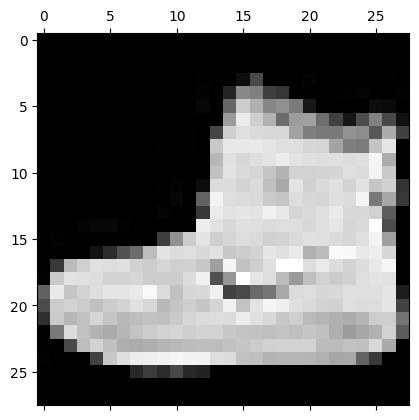

In [22]:
# 샘플 데이터
plt.gray()
plt.matshow( xtrain[0] )
plt.show()

In [23]:
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Input(shape=(28,28,1)) )
model.add( tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu') )
model.add( tf.keras.layers.MaxPooling2D(pool_size=(2,2)) )
model.add( tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu') )

model.add( tf.keras.layers.Flatten() )
model.add( tf.keras.layers.Dense(units=64, activation='relu') )
model.add( tf.keras.layers.BatchNormalization())
model.add( tf.keras.layers.Dense(units=10, activation='softmax') )

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       247,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 258,346 (1009.16 KB)

 Trainable params: 258,218 (1008.66 KB)

 Non-trainable params: 128 (512.00 B)